# Jupyter Notebook 3.2: Modellvalidierung.kNN - Lösung

Zu Beginn des Notebooks werden die Bilbiotheken eingebunden, welche innerhalb des Notebooks zur Verarbeitung genutzt werden.

In [1]:
import matplotlib.pyplot as plt # Bibliothek für Visualisierungen
import numpy as np # Bibliothek für wissenschaftliche Berechnungen
import pandas as pd # Bibliothek zur Datenanalyse
import sklearn # Bibliothek zum maschinellen Lernen

In [2]:
import warnings
warnings.filterwarnings(action='ignore', message='X does not have valid feature names, but KNeighborsClassifier was fitted with feature names')

<hr style="border:1px solid black"> </hr>

### Problemstellung und Vorbereitung: Risse in Stahlproben

Nachdem Sie der Entwicklungsabteilung ein Modell zur Klassifizierung der Stahlqualität versprochen haben, wurde ein neuer Datensatz erhoben, um den Unterschied der beiden Stähle herauszuarbeiten. Dieser Datensatz entstand aus Aufnahmen der Stahloberfläche von Proben des alten und neues Stahls, die einer bestimmten Anzahl von Lastwechseln ausgesetzt wurden, um die Belastung im Bauteil zu simmulieren. Aus Aufnahmen der Proben nach der Belastung konnten dann die Anzahl der Risse und die Breite des längsten Risses ermittelt werden. 

Der hierzu nachgelieferte Datensatz steht Ihnen nun zur Verfügung und soll am Ende des Notebooks mit Ihrem Modell klassifiziert werden. 

![Risse](Stahl.jpg)

Die folgenden Zellen wurden im Rahmen des letzten Jupyter Notebooks bereits genutzt, um die Daten einzulesen und für die Visualisierung vorzubereiten, und werden nun auch hier ausgeführt.

In [3]:
daten = pd.read_excel(r'Qualitaet.xlsx')
daten

,Ausschuss,Anzahl Risse,Größter Riss
0,schlecht,1057,707.41
1,gut,918,494.58
2,gut,1079,571.30
3,schlecht,971,707.41
4,schlecht,1143,770.59
...,...,...,...
492,schlecht,1175,784.13
493,gut,961,598.38
494,schlecht,886,720.95
495,gut,757,643.51


In [4]:
daten = daten.dropna()
daten = daten.replace("gut",0)
daten = daten.replace("schlecht",1)
daten = daten.replace("schlehct",1)
display(daten)

,Ausschuss,Anzahl Risse,Größter Riss
0,1,1057,707.41
1,0,918,494.58
2,0,1079,571.30
3,1,971,707.41
4,1,1143,770.59
...,...,...,...
492,1,1175,784.13
493,0,961,598.38
494,1,886,720.95
495,0,757,643.51


In [5]:
X = daten.iloc[:,1:3]
klasse = daten['Ausschuss']

<hr style="border:1px solid black"> </hr>

### Visualisierung

Der folgende Code definiert eine komplexere Möglichkeit der Visualisierung, die in vergangenen Notebooks bereits hilfreich gewesen ist. Die einzelnen Zeilen müssen nicht nachvollzogen werden und die Funktionalität wird in einem späteren Arbeitsauftrag erläutert. 

In [6]:
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#0000FF', '#00FF00', '#FF0000'])
cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA', '#FFAAAA'])
font_size = 25

def meshGrid(x_data, y_data):
    h = 2  # step size in the mesh, ursprünglich 0.02
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, cmap=cmap_bold, title="", mesh=True):
    xx,yy = meshGrid(x_data, y_data)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,10))
    if mesh:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(x_data, y_data, c=colors, cmap = cmap, s=80, marker='o')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)

<hr style="border:1px solid black"> </hr>

### kNN Algorithmus

<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> In den folgenden Zellen sind unvollständige Vorlagen für das Teilen von Trainingsmenge und Testmenge und das Fitten eines Modells mit der kNN-Klassifikation vorgegeben. Im Anschluss werden die bekannten Visulisierungen erstellt und einige Gütemaße berechnet. Nutzen Sie Ihr bisher erworbenes Wissen, um ein für die Stahklassifikation möglichst "gutes" Modell zu erstellen. Die Zellen können dafür vollständig oder auch teilweise immer wieder neu ausgeführt werden. Kommentieren Sie Ihr Vorgehen innerhalb der Zellen. </div> 

In [7]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [8]:
# Platz für Arbeitsauftrag 
X_train, X_test, y_train, y_test = train_test_split(X, klasse, test_size=0.3, random_state=42, stratify=klasse)

In [9]:
# Platz für Arbeitsauftrag 
k = 25
clf = neighbors.KNeighborsClassifier(k, p = 2 ) # p = 1: Betragsmetrik, p = 2: Euklidische Metrik
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

Grafik mit Trainingsdaten: 

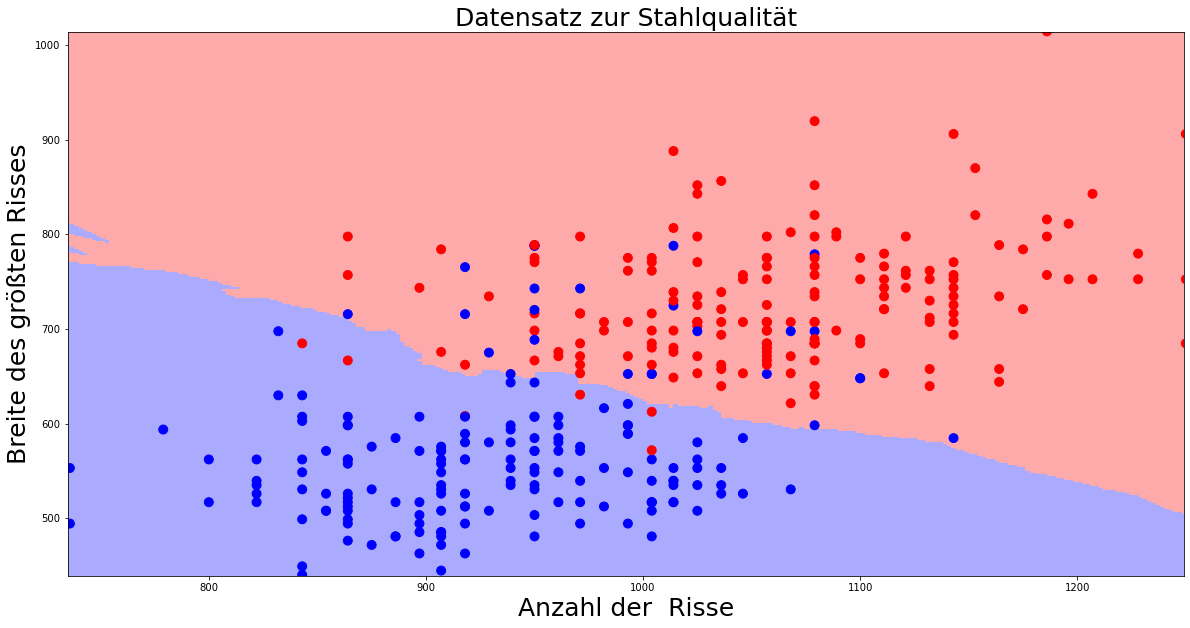

In [10]:
plotPrediction(clf, X_train.iloc[:, 0], X_train.iloc[:, 1], 'Anzahl der  Risse', 'Breite des größten Risses', y_train, title="Datensatz zur Stahlqualität")

Grafik mit Testdaten: 

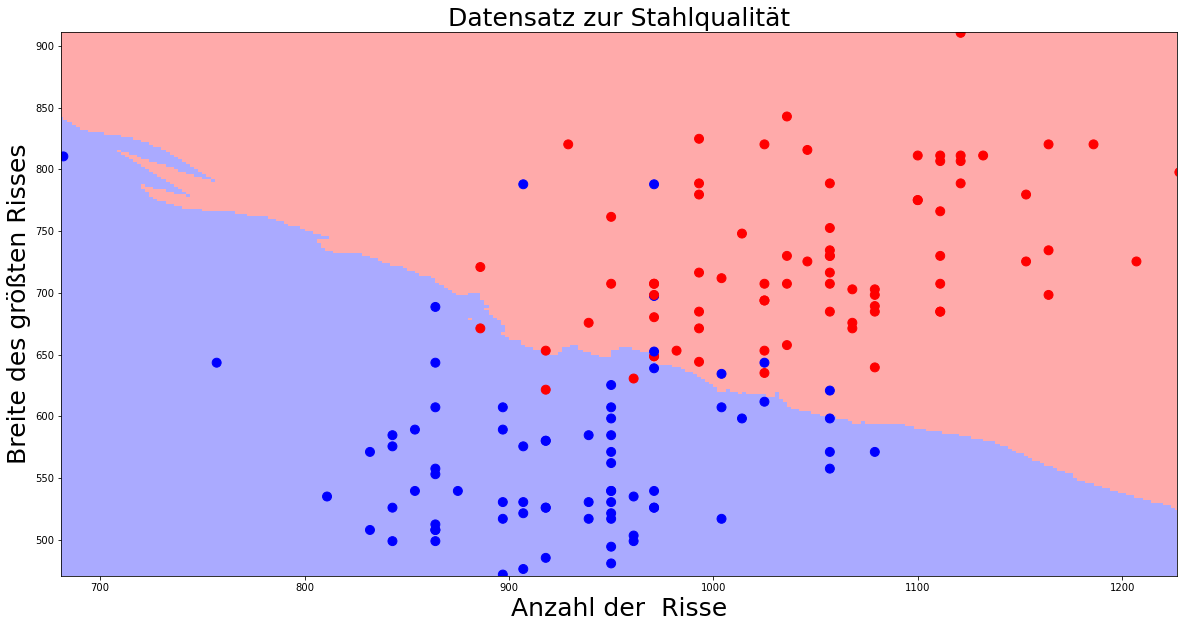

In [11]:
plotPrediction(clf, X_test.iloc[:, 0], X_test.iloc[:, 1], 'Anzahl der  Risse', 'Breite des größten Risses', y_test, title="Datensatz zur Stahlqualität")

Gütemaße: 

In [12]:
cm = confusion_matrix(y_test, clf.predict(X_test)).transpose()
print('Konfusion-Matrix:')
print(cm)
print('Accuracy:')
print(accuracy_score(y_test, clf.predict(X_test)))
prec = cm[0,0]/(cm[0,0]+cm[0,1])
rec = cm[0,0]/(cm[0,0]+cm[1,0])
F1 = 2*(prec*rec)/(prec+rec)
print('Precision, Recall, F1-Score:')
print(prec,rec,F1)

Konfusion-Matrix:
[[66  3]
 [ 8 73]]
Accuracy:
0.9266666666666666
Precision, Recall, F1-Score:
0.9565217391304348 0.8918918918918919 0.9230769230769231


<div class="alert alert-block alert-success">
<b>Frage:</b> Notieren Sie <b>ausführlich</b> die Gründe, aus denen Sie sich für Ihr Modell entschieden haben. Speziell: 
    <ul>
    <li>Wie und warum haben Sie die Hyperparameter ausgewählt?</li>
    <li>Welche Ansprüche hatten Sie an Ihr Modell? </li>
    <li>Konnten diese Ansprüche erfüllt werden? </li>
    </ul>
</div>

**Antwort:** 30% Anteil für die Testmenge ist ein üblicher Richtwert für die Größenordnung des Datensatzes. Die euklidische Metrik wurde ausgewählt, weil sie die unterschiedliche Skalierung der Achsen beider Features besser ausgleicht. Der Wert k=25 sorgt zum einen für eine nicht zu große Varianz des Modells im "wichtigen Bereich" und maximiert den Wert der Precision, welcher die Qualität / Arbeitssicherheit gewährleistet (kein mangelhafter Stahl sollte gut klassifiziert werden). Die "hohe" Anzahl der Falschklassifizierungen bezüglich des guten Stahls lässt sich nicht umgehen, da sich die Punktwolken der Testmenge überlappen. 

<hr style="border:1px solid black"> </hr>

### Klassifizierung des neuen Datensatzes 

Nun wird der angereicherte erste Datensatz (aus der ersten Veranstaltung) eingelesen und für die Klassifizierung mit Ihrem Modell vorbereitet.

In [13]:
daten_2 = pd.read_excel(r'CracksCounts_neu.xlsx')
daten_2

,Klasse,Anzahl Risse,Größter Riss
0,alt,737,908.4
1,alt,813,851.7
2,alt,958,860.2
3,alt,1001,811.9
4,alt,868,843.6
5,alt,891,860.8
6,alt,814,840.1
7,alt,739,891.5
8,alt,700,900.6
9,alt,933,899.3


In [14]:
daten_2 = daten_2.replace("alt",0)
daten_2 = daten_2.replace("neu",1)
display(daten_2)

,Klasse,Anzahl Risse,Größter Riss
0,0,737,908.4
1,0,813,851.7
2,0,958,860.2
3,0,1001,811.9
4,0,868,843.6
5,0,891,860.8
6,0,814,840.1
7,0,739,891.5
8,0,700,900.6
9,0,933,899.3


In [15]:
X_2 = daten_2.iloc[:,1:3]
klasse_2 = daten_2['Klasse']
X_2

,Anzahl Risse,Größter Riss
0,737,908.4
1,813,851.7
2,958,860.2
3,1001,811.9
4,868,843.6
5,891,860.8
6,814,840.1
7,739,891.5
8,700,900.6
9,933,899.3


<div class="alert alert-block alert-success">
<b>Frage:</b> Welche Variable muss in <tt>clf.predict</tt> eingegeben werden, um die Klassifizierung des zweiten Datensatzes mit vorzunehmen?
</div>

In [16]:
# Platz für Arbeitsauftrag
clf.predict(X_2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

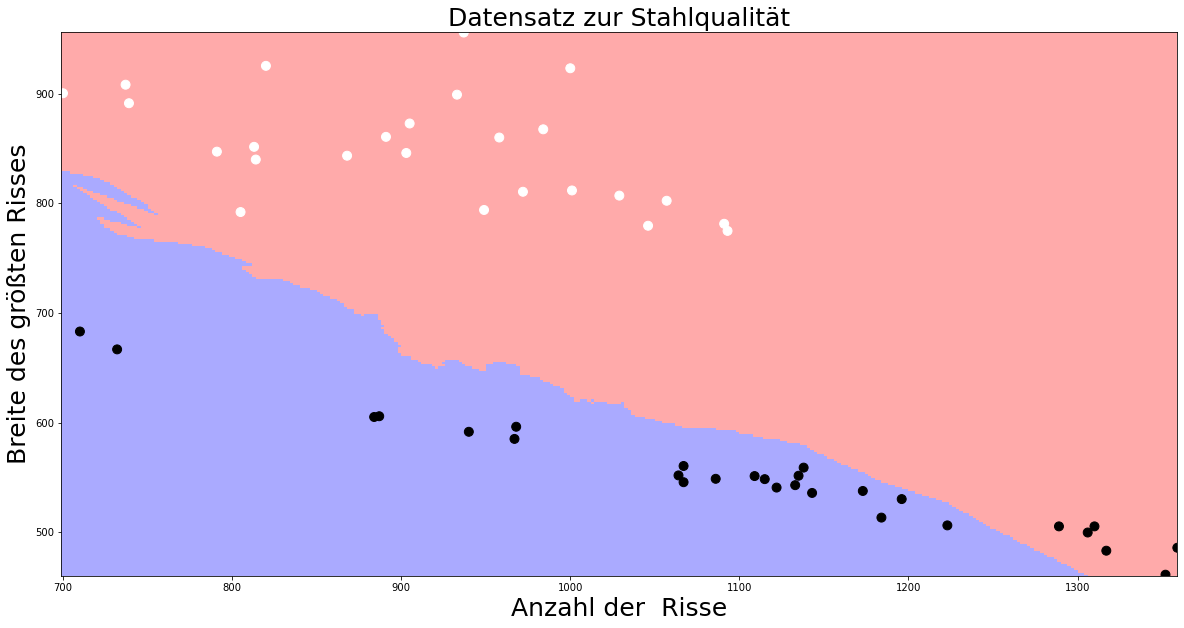

In [17]:
plotPrediction(clf, X_2.iloc[:, 0], X_2.iloc[:, 1], 'Anzahl der  Risse', 'Breite des größten Risses', klasse_2, cmap='binary', title="Datensatz zur Stahlqualität")
# cmap 'binary': 0: weiß // 1: schwarz. Hier also: alt - 0 - weiß // neu - 1 - schwarz

<div class="alert alert-block alert-success">
<b>Frage:</b> Welche Aussage kann aus den vorhergehenden Ausgaben geschlossen werden? 
</div>

**Antwort:** In der Tendenz scheint der neue Stahl deutlich besser zu sein als der alte, denn alle Proben des alten Stahls wurden als schlecht und viele Proben des neuen Stahls als gut klassifiziert. Problematisch ist dabei allerdings, dass manche Ausprägungen des Features "Anzahl Risse" außerhalb der Spannweite der Datengrundlage liegen. Dies entspricht einer Art Extrapolation und es sollte mit den verantwortlichen Ingenieur:innen abgeklärt werden, ob es eine mit dem Modell nicht darstellbare Grenze bezüglich "zu viele Risse" gibt. Es ist außerdem anzumerken, dass der Schluss nur auf einer Grundlage von ca. 50 Proben basiert.  

<hr style="border:1px solid black"> </hr>

### Projektabschluss

Sie haben nun ein Modell mit Hilfe des kNN gefittet und das gefittete Modell zur Beurteilung des neuen Datensatzes genutzt. Um das Projekt abzuschließen, bearbeiten Sie den letzten Arbeitsauftrag.

<div class="alert alert-block alert-success">
Notieren Sie <b>ausführlich</b> die Antwort auf die folgende Frage: Welche Empfehlung an die Entscheidungsträger Ihrer Firma würden Sie zum aktuellen Zeitpunkt herausgeben? Begründen Sie Ihre Antwort.
</div>

**Antwort:** Zum aktuellen Zeitpunkt sollte noch keine finale Entscheidung getroffen werden. Es ist zwar eine eindeutige Tendenz zur Qualität der beiden Stahlarten unter der gegebene Belastung zu erkennen (siehe oben), dennoch ist das Modell noch unvollständig (siehe oben). Außerdem müssen vor der finalen Entscheidung weitere Einflussfaktoren (bspw. Kostenvergleich der beiden Stähle) mitgedacht werden. Die einzig sichere Entscheidung auf Grundlage des obigen Modells ist, dass es sich lohnen könnte, weiter Untersuchungen zum neuen Stahl anzustellen. Laut dem CRISP-DM Modell befinden wir uns in der Phase Evaluation. Falls nicht bereits von einem anderen Teil des Projektteams gemacht, folgt nun der Schritt zum Business Understandig, um hier Untersuchungen zu weiteren Einflussfaktoren vorzubereiten. 